<a href="https://colab.research.google.com/github/kaushalpowar/nlp-with-transformers/blob/main/Text_Classification_%F0%9F%A4%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Hugging Face🤗 Dataset

In [ ]:
!pip install datasets


In [4]:
from datasets import list_datasets

In [5]:
all_datasets = list_datasets()
print(f"There are {len(all_datasets)} datasets currently available on the Hub\n")
print(f"The first 10 are: {all_datasets[:10]}")

There are 24176 datasets currently available on the Hub

The first 10 are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [6]:
from datasets import load_dataset

In [7]:
emotions = load_dataset("emotion")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [8]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [22]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [23]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [24]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

##From Dataset to Dataframe

In [97]:
import pandas as pd

In [88]:
emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [89]:
def label_int2str(row):
  return emotions["train"].features["label"].int2str(row)


df['label_name'] = df["label"].apply(label_int2str)

In [16]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [17]:
import matplotlib.pyplot as plt


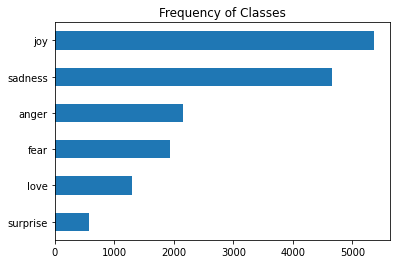

In [18]:
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

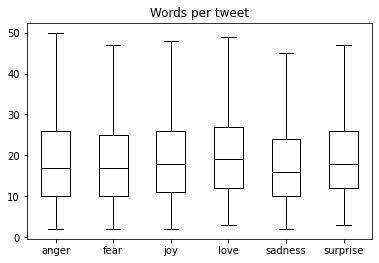

In [ ]:
df["Words per tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words per tweet", by="label_name", grid = False,showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [ ]:
#emotions.reset_format()

##From Text to Tokens

###Character Tokenization

In [9]:
text = "This is text a string"
tokenized_text = list(text)
print(tokenized_text)

['T', 'h', 'i', 's', ' ', 'i', 's', ' ', 't', 'e', 'x', 't', ' ', 'a', ' ', 's', 't', 'r', 'i', 'n', 'g']


In [10]:
token2idx = {ch : idx for idx,ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, 'T': 1, 'a': 2, 'e': 3, 'g': 4, 'h': 5, 'i': 6, 'n': 7, 'r': 8, 's': 9, 't': 10, 'x': 11}


In [11]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[1, 5, 6, 9, 0, 6, 9, 0, 10, 3, 11, 10, 0, 2, 0, 9, 10, 8, 6, 7, 4]


In [12]:
import torch
import torch.nn.functional as F

In [13]:
input_idss = torch.tensor(input_ids)
one_hot_encoding = F.one_hot(input_idss, num_classes=len(token2idx)) 


In [14]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor: {input_ids[0]}")
print(f"One-hot: {one_hot_encoding[0]}")


Token: T
Tensor: 1
One-hot: tensor([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


## Word Tokenization

In [15]:
tokenized_text = text.split()
print(tokenized_text)

['This', 'is', 'text', 'a', 'string']


## Subword Tokenization

In [18]:
!pip install transformers

In [19]:
from transformers import AutoTokenizer


In [20]:
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [21]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 2023, 2003, 3793, 1037, 5164, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}


In [22]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'this', 'is', 'text', 'a', 'string', '[SEP]']


In [23]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] this is text a string [SEP]


In [24]:
tokenizer.vocab_size

30522

In [25]:
tokenizer.model_max_length

512

In [26]:
#names of the fields that the model expects in its forward pass
tokenizer.model_input_names

['input_ids', 'attention_mask']

###Now that we have a basic understanding of the tokenization process for a single string, let’s see how we can tokenize the whole dataset!

## Tokenizing whole dataset

In [27]:
def tokenize(batch):
  return tokenizer(batch["text"], padding = True, truncation = True)

In [28]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


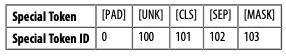

In [29]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [30]:
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


## Training a Text Classifier

### Using pretrained models

In [31]:
from transformers import AutoModel

In [32]:
model_ckpt = 'distilbert-base-uncased'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).



### Extracting last hidden states


In [33]:
text = 'this is a test'
inputs = tokenizer(text, return_tensors='pt')
print(f"Input tensor shape: {inputs['input_ids'].size()} ")


Input tensor shape: torch.Size([1, 6]) 


In [34]:
# place them on the same device as the model and pass the inputs as follows:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
  outputs = model(**inputs)
print(outputs)
#Here we’ve used the torch.no_grad() context manager to disable the automatic cal‐ culation of the gradient

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [35]:
outputs.last_hidden_state.size()
# we see that it has the shape [batch_size, n_tokens, hidden_dim]

torch.Size([1, 6, 768])

In [36]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [37]:
#Now we know how to get the last hidden state for a single string; 
#let’s do the same for the whole dataset by creating a new hidden_state column that stores all these vectors.
def extract_hidden_states(batch):
  #place model input on GPU
  inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
#Extract last hidden state
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
#Return vector for[CLS] token
  return {"hidden_state":last_hidden_state[:,0].cpu().numpy()}




In [38]:
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [39]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [42]:
emotions_hidden["train"].column_names
#Now that we have the hidden states associated with each tweet, the next step is to train a classifier on them.

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

## Creating a feature matrix

In [46]:
import numpy as np
X_train = np.array(emotions_hidden["train"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_valid = np.array(emotions_hidden["validation"]["label"])

X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

## Training simple classifier

In [64]:
import matplotlib.pyplot as plt

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
#We can increase 'max_iter' to got guarantee convergece
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.633

In [58]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)
#In Scikit-learn there is a DummyClassifier that can be used to build a classifier
# with simple heuristics such as always choosing the majority class or always drawing a random class. 
#In this case the best-performing heuristic is to always choose the most frequent class, which yields an accuracy of about 35%


0.352

In [61]:
labels = emotions["train"].features["label"].names


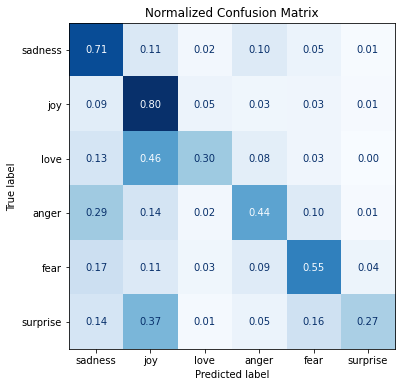

In [68]:
#So, our simple classifier with DistilBERT embeddings is significantly better than 
#our baseline. We can further investigate the performance of the model by looking at 
#the confusion matrix of the classifier, which tells us the relationship between the true and predicted labels:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_pred, y_true, labels):
  cm = confusion_matrix(y_true, y_pred, normalize="true")
  fig, ax = plt.subplots(figsize=(6,6))
  disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=labels)
  disp.plot(cmap='Blues', values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized Confusion Matrix")
  plt.show()


y_pred = lr_clf.predict(X_valid)
plot_confusion_matrix(y_pred, y_valid, labels)

We can see that anger and fear are most often confused with sadness, which agrees with the observation we made when visualizing the embeddings. Also, love and surprise are frequently mistaken for joy.

## Fine-Tuning Transformers

### Loading a pretrained model

In [70]:
from transformers import AutoModelForSequenceClassification
num_labels = 6
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'pre_classi

### Defining the performance metrics

In [76]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

### Training a model

In [72]:
from huggingface_hub import notebook_login
notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [74]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"]) //batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True, 
                                  log_level="error")
     

In [77]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args, 
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();
     

/content/distilbert-base-uncased-finetuned-emotion is already a clone of https://huggingface.co/kaushalpowar/distilbert-base-uncased-finetuned-emotion. Make sure you pull the latest changes with `repo.git_pull()`.
/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.224800,0.181042,0.927000,0.926812
2,0.136000,0.159018,0.932500,0.932997


In [78]:
    preds_output = trainer.predict(emotions_encoded["validation"])

In [79]:
preds_output.metrics

{'test_loss': 0.15901777148246765,
 'test_accuracy': 0.9325,
 'test_f1': 0.9329974523716967,
 'test_runtime': 4.2013,
 'test_samples_per_second': 476.044,
 'test_steps_per_second': 7.617}

In [80]:
y_preds = np.argmax(preds_output.predictions, axis=1)

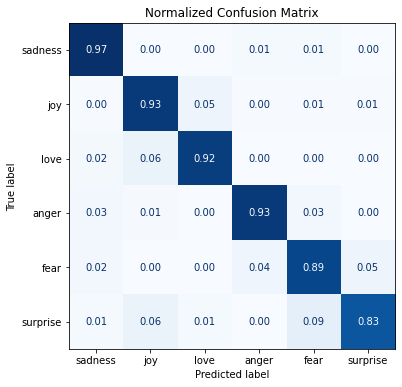

In [81]:
plot_confusion_matrix(y_preds, y_valid, labels)

### Error analysis

In [82]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # Place all input tensors on the same device as the model
    inputs = {k:v.to(device) for k,v in batch.items() 
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device), 
                             reduction="none")

    # Place outputs on CPU for compatibility with other dataset columns   
    return {"loss": loss.cpu().numpy(), 
            "predicted_label": pred_label.cpu().numpy()}

In [85]:
# Convert our dataset back to PyTorch tensors
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])
# Compute loss values
emotions_encoded["validation"] = emotions_encoded["validation"].map(forward_pass_with_label, batched=True, batch_size=16)
     

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [90]:

emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(label_int2str))

In [91]:
df_test.sort_values("loss", ascending=False).head(10)


,text,label,predicted_label,loss
1950,i as representative of everything thats wrong ...,surprise,sadness,6.983175
1840,id let you kill it now but as a matter of fact...,joy,fear,6.389897
882,i feel badly about reneging on my commitment t...,love,sadness,6.220241
1963,i called myself pro life and voted for perry w...,joy,sadness,5.909684
1111,im lazy my characters fall into categories of ...,joy,fear,5.568344
1509,i guess this is a memoir so it feels like that...,joy,fear,5.254604
1870,i guess i feel betrayed because i admired him ...,joy,sadness,5.046631
1964,i feel vaguely cheated and a little amused,joy,anger,4.871666
1836,i got a very nasty electrical shock when i was...,fear,anger,4.700706
1852,i arrived home with a strange feeling of happi...,sadness,fear,4.684660


In [92]:
df_test.sort_values("loss", ascending=True).head(10)


,text,label,predicted_label,loss
1873,i feel practically virtuous this month i have ...,joy,joy,0.003355
620,i shall move right along to the post interview...,joy,joy,0.003435
1012,i definitely succumbed to pre holiday sales bu...,joy,joy,0.003551
1418,i am a big believer in the phrase that some pe...,joy,joy,0.003570
1561,i came to tv stations for first debut stage i ...,joy,joy,0.003597
1101,im feeling good i increase,joy,joy,0.003627
669,i am not feeling very joyful today its been a ...,joy,joy,0.003652
1020,i feel that the content i have in mind isnt re...,joy,joy,0.003655
1147,i type i feel bouncy and excited to get out my...,joy,joy,0.003692
1618,i had a good feeling about the presentation an...,joy,joy,0.003710


In [93]:
trainer.push_to_hub(commit_message="Training completed!")


remote: Scanning LFS files of refs/heads/main for validity...        
remote: LFS file scan complete.        
To https://huggingface.co/kaushalpowar/distilbert-base-uncased-finetuned-emotion
   76fc04d..f27636e  main -> main

remote: LFS file scan complete.        
To https://huggingface.co/kaushalpowar/distilbert-base-uncased-finetuned-emotion
   76fc04d..f27636e  main -> main

To https://huggingface.co/kaushalpowar/distilbert-base-uncased-finetuned-emotion
   f27636e..851a96e  main -> main

   f27636e..851a96e  main -> main



'https://huggingface.co/kaushalpowar/distilbert-base-uncased-finetuned-emotion/commit/f27636ee0c44a7de48cd084298da516049349b46'

In [94]:
from transformers import pipeline

# Change `transformersbook` to your Hub username
model_id = "transformersbook/distilbert-base-uncased-finetuned-emotion"
classifier = pipeline("text-classification", model=model_id)
     

In [99]:
custom_tweet = "I saw a movie today and it was really bad."
preds = classifier(custom_tweet, return_all_scores=True)


/usr/local/lib/python3.9/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


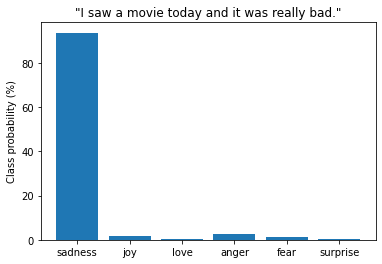

In [100]:
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()
